# Lab 4: Basic regression - Predict fuel efficiency



## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # we use this library to load the dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Load data

In [3]:
# Load the 'mpg' dataset using seaborn library into a Pandas DataFrame
df = sns.load_dataset('mpg')

MPG dataset can be viewed online at  
https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv

## Data Exploration - Pandas Review

### Show the first 5 rows of the dataset

In [5]:
from google.colab import files
uploaded = files.upload()


Saving mpg.csv to mpg.csv


In [6]:
import pandas as pd
df = pd.read_csv("mpg.csv")
print(df.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


### Show the size of the dataframe

In [7]:
df_shape = df.shape
df_shape

(398, 9)

[link text](https://)### Find the columns name and their types (numerical or categorical)

In [12]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("mpg.csv")

column_types = df.dtypes.apply(lambda x: 'numerical' if pd.api.types.is_numeric_dtype(x) else 'categorical')

print(column_types)


Saving mpg.csv to mpg (2).csv
mpg               numerical
cylinders         numerical
displacement      numerical
horsepower        numerical
weight            numerical
acceleration      numerical
model_year        numerical
origin          categorical
name            categorical
dtype: object


### Find the number of missing values in each column

In [15]:

missing_values = df.isnull().sum()
print(missing_values)


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


### Handle the missing values in the dataframe

Since the number of missing values is low, we can simply drop the rows containing them. However, as a practice and review, let's substitute the missing values in the numerical columns (if any) with the mean of the respective column and the missing values in the categorical columns (if any) with the median of the respective column.

In [16]:

numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.mean()))  # Replace missing numerical values with column mean
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))  # Replace missing categorical values with mode

print("Missing values after handling:")
print(df.isnull().sum())

df.to_csv("mpg_cleaned.csv", index=False)
print("Cleaned dataset saved as mpg_cleaned.csv")


Missing values after handling:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
Cleaned dataset saved as mpg_cleaned.csv


### Compute the average and the median weight

In [17]:
average_weight = df['weight'].mean()
median_weight = df['weight'].median()

average_weight, median_weight


(2970.424623115578, 2803.5)

### Find the number of cars that weight more than 2000 kgs

In [18]:
df = pd.read_csv("mpg.csv")

df['weight_kg'] = df['weight'] * 0.453592

heavy_cars_count = (df['weight_kg'] > 2000).sum()

print(f"Number of cars that weigh more than 2000 kg: {heavy_cars_count}")

Number of cars that weigh more than 2000 kg: 26


### Find how many cars there are for each number of cylinders

In [19]:
cylinder_counts = df['cylinders'].value_counts()

print("Number of cars for each cylinder count:")
print(cylinder_counts)

Number of cars for each cylinder count:
cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64


### Find what are the car models with number of cylinders (3 or 5)

In [20]:
filtered_cars = df[df['cylinders'].isin([3, 5])]

print("Car models with 3 or 5 cylinders:")
print(filtered_cars[['name', 'cylinders']])

Car models with 3 or 5 cylinders:
                    name  cylinders
71       mazda rx2 coupe          3
111            maxda rx3          3
243           mazda rx-4          3
274            audi 5000          5
297   mercedes benz 300d          5
327  audi 5000s (diesel)          5
334        mazda rx-7 gs          3


### Show the `value_counts()` of `origin` column or show the unique values of this column.

In [21]:
unique_origins = df['origin'].unique()
print("Unique values in the 'origin' column:", unique_origins)

origin_counts = df['origin'].value_counts()
print("\nNumber of cars from each origin:")
print(origin_counts)

Unique values in the 'origin' column: ['usa' 'japan' 'europe']

Number of cars from each origin:
origin
usa       249
japan      79
europe     70
Name: count, dtype: int64


## Data Preprocessing

### Use one hot encoding to change the categorical values of `origin` column to numerical values.

- use `pd.get_dummies()` method to do the encoding

In [22]:
df_encoded = pd.get_dummies(df, columns=['origin'], prefix='origin')

print("Dataset after one-hot encoding on 'origin' column:")
print(df_encoded.head())

Dataset after one-hot encoding on 'origin' column:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year                       name    weight_kg  origin_europe  \
0          70  chevrolet chevelle malibu  1589.386368          False   
1          70          buick skylark 320  1675.115256          False   
2          70         plymouth satellite  1558.542112          False   
3          70              amc rebel sst  1557.181336          False   
4          70                ford torino  1564.438808          False   

   origin_japan  origin_usa  
0         False        True  
1         False        True  
2    

### Remove the name column form the dataframe to have all numerical dataframe.

In [23]:
df_numeric = df.drop(columns=['name'])

print("DataFrame after removing the 'name' column:")
print(df_numeric.head())

DataFrame after removing the 'name' column:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin    weight_kg  
0          70    usa  1589.386368  
1          70    usa  1675.115256  
2          70    usa  1558.542112  
3          70    usa  1557.181336  
4          70    usa  1564.438808  


### Does the input needs reshaping?

In [24]:
# If using a Dense NN → NO reshaping needed.
# If using CNN or LSTM → YES, reshape needed.

### Split the data into training and test sets and form `train_features`, `train_labels`, `test_features`, `test_labels`

In [25]:
from sklearn.model_selection import train_test_split
#your code here


df = df.drop(columns=['name'])
X = df.drop(columns=['mpg'])
y = df['mpg']

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Features Shape:", train_features.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Features Shape:", test_features.shape)
print("Test Labels Shape:", test_labels.shape)

Train Features Shape: (318, 8)
Train Labels Shape: (318,)
Test Features Shape: (80, 8)
Test Labels Shape: (80,)


### For simplicity in the following steps, convert the dataset from a pandas DataFrame to a numpy array.

In [26]:
train_features = np.array(train_features)
train_labels = np.array(train_labels)
test_features = np.array(test_features)
test_labels = np.array(test_labels)

## Normalization layer

To ensure stable training of neural networks, we typically normalize the data. This process also enhances the convergence of the gradient descent algorithm.

There is not single way to normalize the data. You can also use `scikit-learn `or `pandas` to do it. However, in this lab, we will use the normalization layer provided by tensorflow which matches the other parts of the model.

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [31]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Then, fit the state of the preprocessing layer to the data by calling `Normalization.adapt`.

It calculates the mean and variance of each feature, and store them in the layer

In [ ]:
normalizer.adapt(train_features)

When the layer is called, it returns the input data, with each feature independently normalized.

In [ ]:
first = train_features[0]
print('First example:', first)
print()
print('Normalized:', normalizer(first).numpy())

## **Approach #1:** Regression using `Linear Regression`

**You are welcome to use scikit-learn to perform linear regression on this dataset.**

However, here we aim to implement it using TensorFlow.

- As we saw in Lab Week 2, `logistic regression` is essentially a single neuron with a `sigmoid` activation function.

- Similarly, `linear regression` can be viewed as a single neuron with a `linear` activation function.

### **Step 1:** Linear regression model architecture

In [33]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(1, activation='linear')
])

**Note:** You can define your model all at once like the cell above or you can buid the model incrementaly  (suitable for your assignment)

In [34]:
# Defining the model incrementaly (suitable for your assignment)
linear_model = tf.keras.Sequential()
linear_model.add(normalizer)
linear_model.add(layers.Dense(1, activation='linear'))

### **Step 2:** Configure the model with Keras `Model.compile()`

The most important arguments to compile are the `loss` and the `optimizer`, since these define what will be optimized (`"mean_absolute_error"`) and how (using the `tf.keras.optimizers.Adam(learning_rate=0.1)`).

**arguments:**
- optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
- loss='mean_absolute_error'

### **Step 3:** Train the model using the `Model.fit()` for `100` epochs, and store the output in a variable named history.

In [39]:
history = linear_model.fit(train_features, train_labels, epochs=100)

In [40]:
history.history

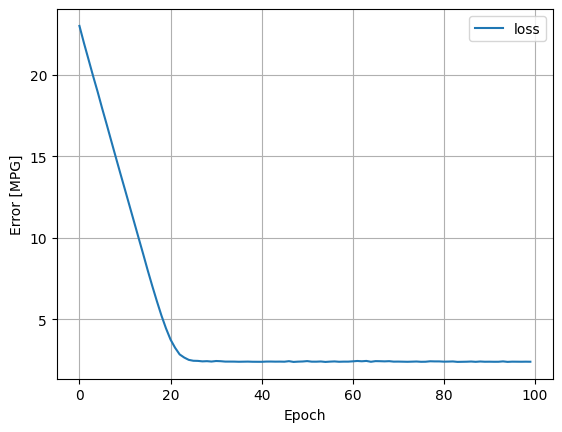

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

### Get the model summary

In [ ]:
linear_model.summary()

### **Step 4:** Evaluate the linear model on the test set using Keras `Model.evaluate()` and see the `mean_absolute_error` and save the result for future comparison.

In [ ]:
test_loss = linear_model.evaluate(test_features, test_labels)

linear_regression_mae = test_loss

print(f"Test Mean Absolute Error (MAE): {linear_regression_mae:.2f} MPG")


## **Approach #2:** Regression using a `Deep Neural Network (DNN)`

### Solve the same problem and using deep neural network with the sample architecture;
- 1st hidden layer no. of units =  64
- 2nd hidden layer no. of units = 64
- Choose appropriate `activation` functions for hidden and output layers

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(1, activation='linear')
])

linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

history = linear_model.fit(train_features, train_labels, epochs=100, verbose=1)

test_loss = linear_model.evaluate(test_features, test_labels)
linear_regression_mae = test_loss

def plot_loss(history):
    plt.plot(history.history['loss'], label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

dnn_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error'
)

dnn_history = dnn_model.fit(train_features, train_labels, epochs=100, verbose=1)

dnn_test_loss = dnn_model.evaluate(test_features, test_labels)
dnn_mae = dnn_test_loss

def plot_dnn_loss(history):
    plt.plot(history.history['loss'], label='DNN Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error (MPG)')
    plt.legend()
    plt.grid(True)

plot_dnn_loss(dnn_history)

print(f"Test Mean Absolute Error (MAE) for Linear Regression: {linear_regression_mae:.2f} MPG")
print(f"Test Mean Absolute Error (MAE) for DNN: {dnn_mae:.2f} MPG")


### Print the model summary (after training). How many parameters are there in the model?

In [ ]:
linear_model.summary()

### You can see even this small model has more than 4000 trainable parameters. The more the number of parameters, the longer the training time and cost. Search the net and see how many trainable parameters does the `ChatGPT` model have? What about `DeepSeek` model? (Optional)

## Compare the evaluation result of the two approaches, i.e., linear regression and deep neural network.

In [ ]:
print(f"Test Mean Absolute Error (MAE) for Linear Regression: {linear_regression_mae:.2f} MPG")
print(f"Test Mean Absolute Error (MAE) for Deep Neural Network: {dnn_mae:.2f} MPG")


## Use the following large model and evaluate it on the test set.

In [ ]:
model_dnn_large = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])



model_dnn_large.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error'
)

large_dnn_history = model_dnn_large.fit(train_features, train_labels, epochs=100, verbose=1)
large_dnn_test_loss = model_dnn_large.evaluate(test_features, test_labels)
large_dnn_mae = large_dnn_test_loss

print(f"Test Mean Absolute Error (MAE) for Large DNN: {large_dnn_mae:.2f} MPG")

def plot_large_dnn_loss(history):
    plt.plot(history.history['loss'], label='Large DNN Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error (MPG)')
    plt.legend()
    plt.grid(True)

plot_large_dnn_loss(large_dnn_history)

### Explain your observation. Why do you think the large model is not performing well?

- hint: when the number of trainable parameters is very large (even larger than the number of data points), the model may overfit the training data.One way to solve this problem is to use more data.

Overfitting occurs because the model has too many parameters for the dataset size.
Test MAE does not improve much despite a larger model.

Solution: Add more data or use regularization (dropout, L2).